In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义位置映射字典
location_mapping = {1: 'Huilongguan', 2: 'Tiantongyuan', 3: 'Huoying', 4: 'Shahe'}

# 读取售价数据
house_data = pd.read_excel(r'C:\Users\DELL\Desktop\数据\house_data.xlsx')
# 映射 location 列
house_data['location'] = house_data['location'].map(location_mapping)

# 读取租金数据
rent_data = pd.read_excel(r'C:\Users\DELL\Desktop\数据\rent_data.xlsx')
# 映射 location 列
rent_data['location'] = rent_data['location'].map(location_mapping)

In [17]:
# 按街区描述售价数据
grouped_house = house_data.groupby('location')
for location, group in grouped_house:
    print(f"House price data - Description of {location} block:")
    print(group.describe())
    print("\n")

House price data - Description of Huilongguan block:
             area      price/m2
count  600.000000    600.000000
mean   108.215350  51963.518333
std     41.473231  11569.521171
min     32.210000  26724.000000
25%     89.015000  43128.750000
50%     97.490000  51498.000000
75%    122.317500  61884.000000
max    376.670000  95574.000000


House price data - Description of Huoying block:
             area      price/m2
count  164.000000    164.000000
mean    95.094329  48109.981707
std     31.220849   9044.109389
min     35.470000  28842.000000
25%     83.620000  41740.250000
50%     89.845000  45562.500000
75%    102.310000  55324.250000
max    303.830000  68882.000000


House price data - Description of Shahe block:
              area       price/m2
count  1200.000000    1200.000000
mean    280.455600   52117.892500
std     236.349144   23192.986389
min      25.440000   19672.000000
25%      86.000000   35978.000000
50%     240.000000   42680.500000
75%     399.000000   61407.000000

In [18]:
# 按街区描述租金数据
grouped_rent = rent_data.groupby('location')
for location, group in grouped_rent:
    print(f"Rent data - Description of {location} block:")
    print(group.describe())
    print("\n")

Rent data - Description of Huilongguan block:
             area    rent_price
count  600.000000    600.000000
mean    59.750000   4043.490000
std     59.261686   3359.310178
min     10.000000   1000.000000
25%     19.000000   1800.000000
50%     41.500000   2800.000000
75%     86.000000   5500.000000
max    683.000000  28000.000000


Rent data - Description of Huoying block:
             area   rent_price
count   45.000000    45.000000
mean    46.355556  3072.444444
std     33.213603  1788.189988
min      8.000000  1000.000000
25%     17.000000  1500.000000
50%     25.000000  2500.000000
75%     73.000000  4800.000000
max    120.000000  6500.000000


Rent data - Description of Shahe block:
              area     rent_price
count  1199.000000    1199.000000
mean     90.775646    5481.017515
std     114.660713    9759.992785
min      10.000000    1000.000000
25%      38.000000    2600.000000
50%      72.000000    3800.000000
75%      89.000000    4500.000000
max    1498.000000  150000.00

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


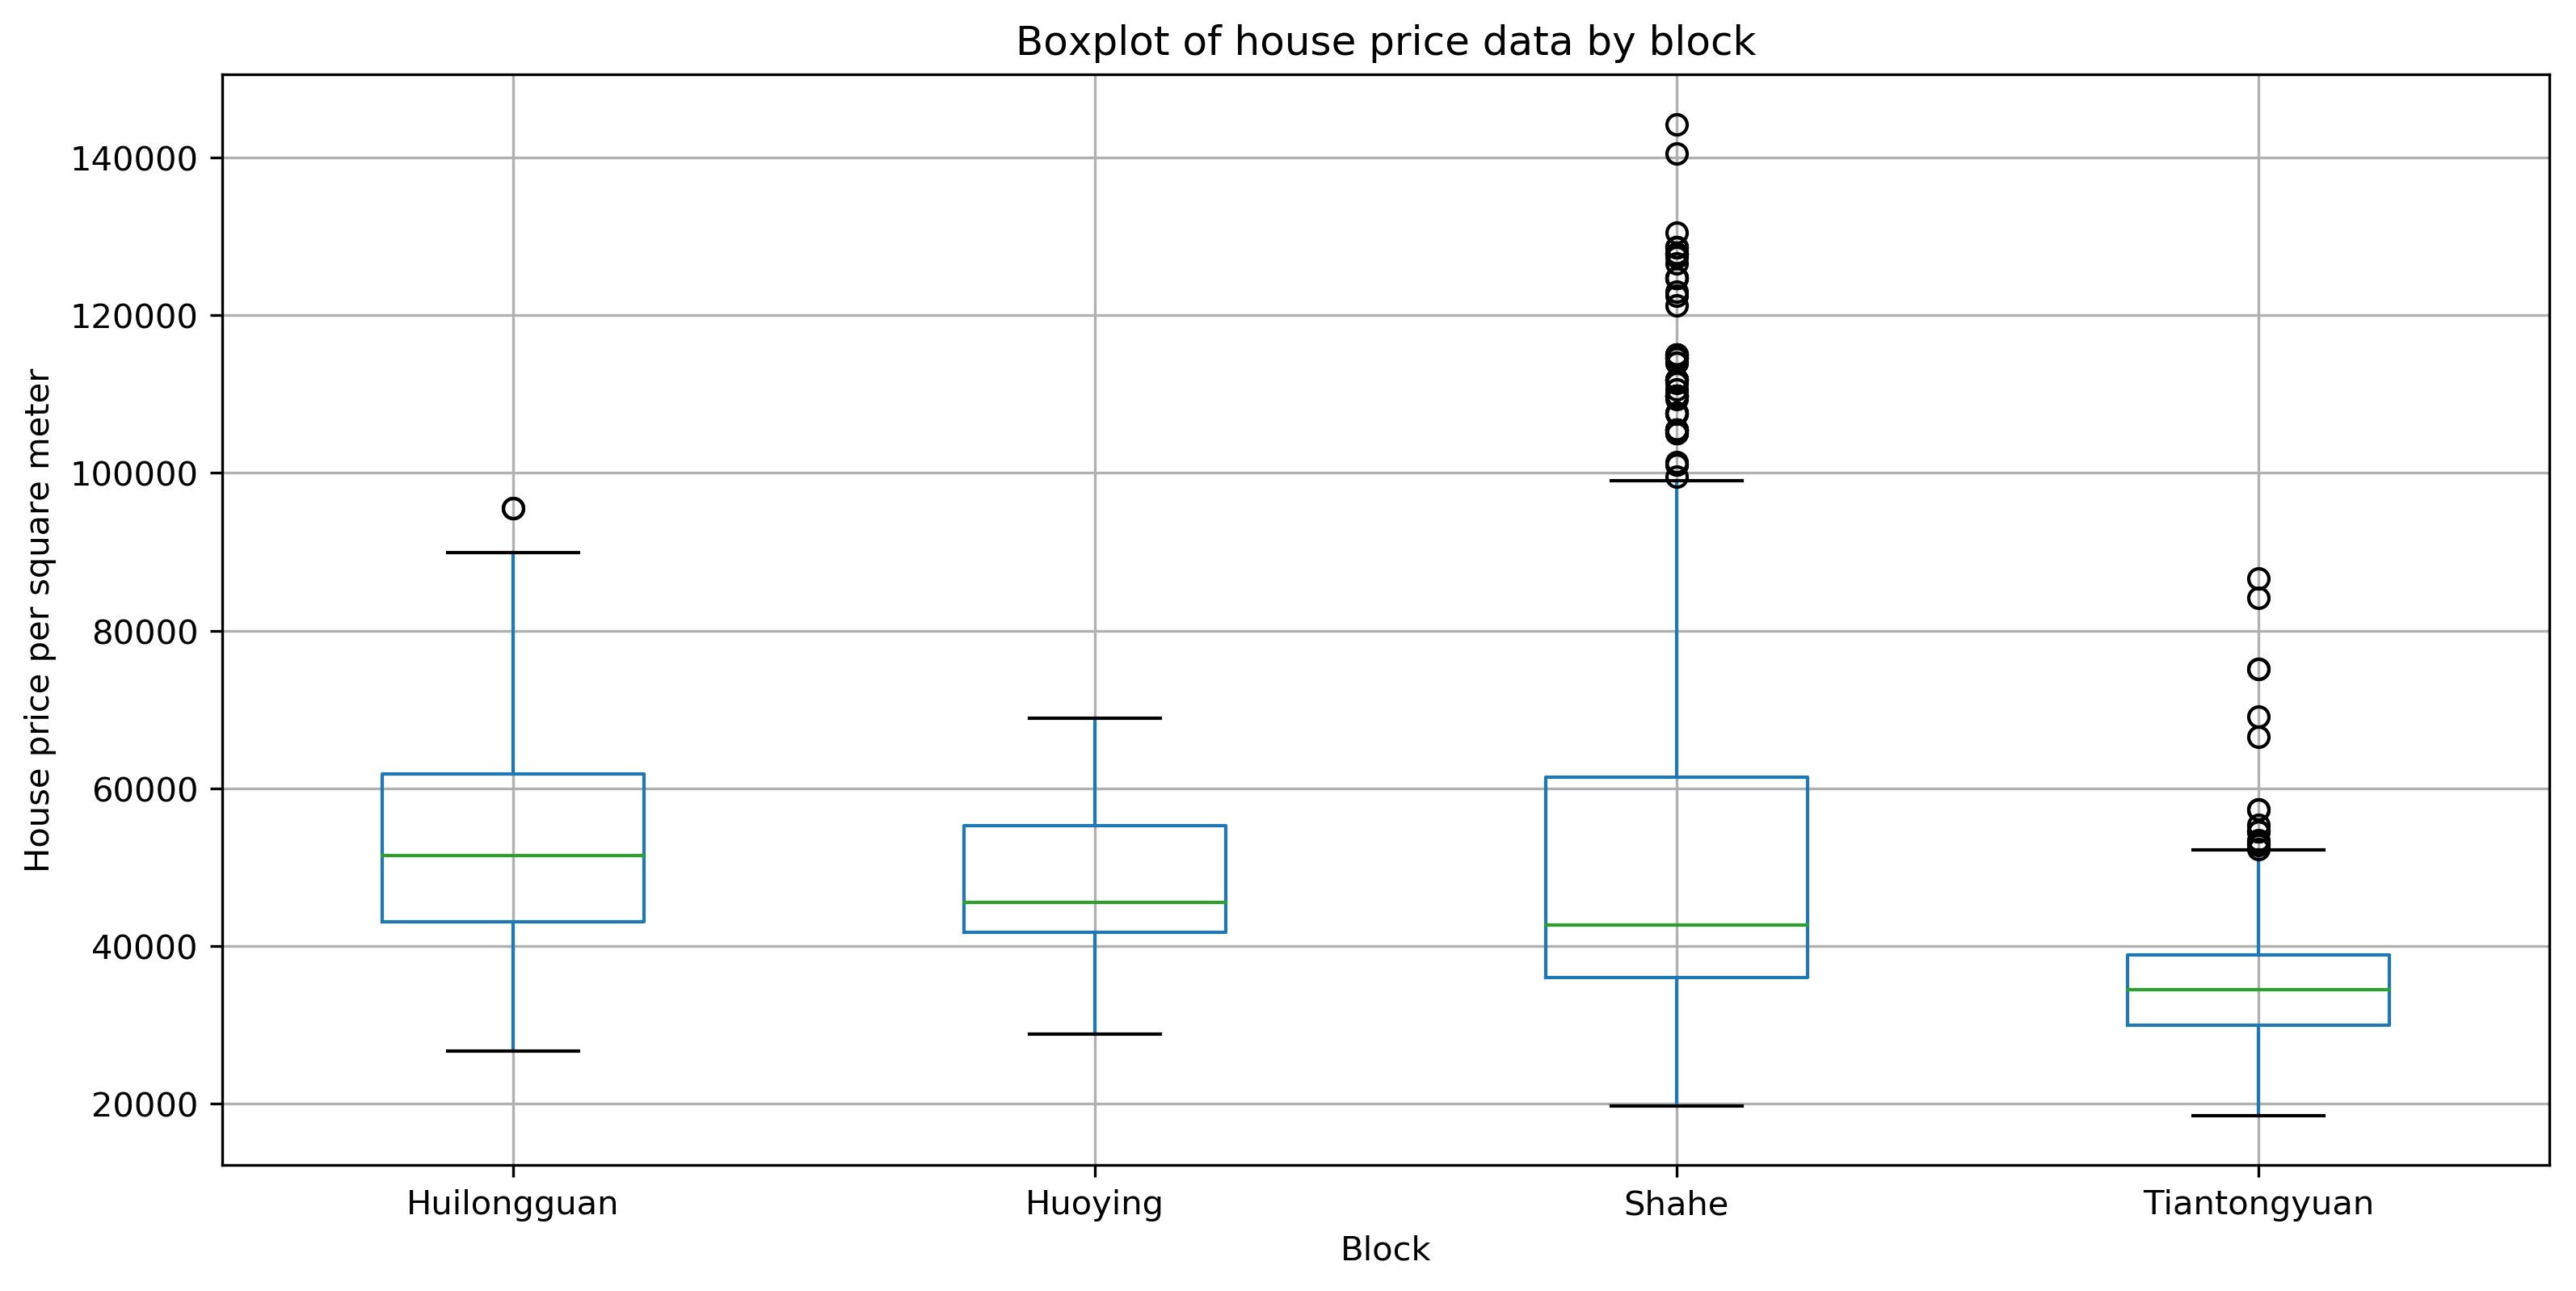

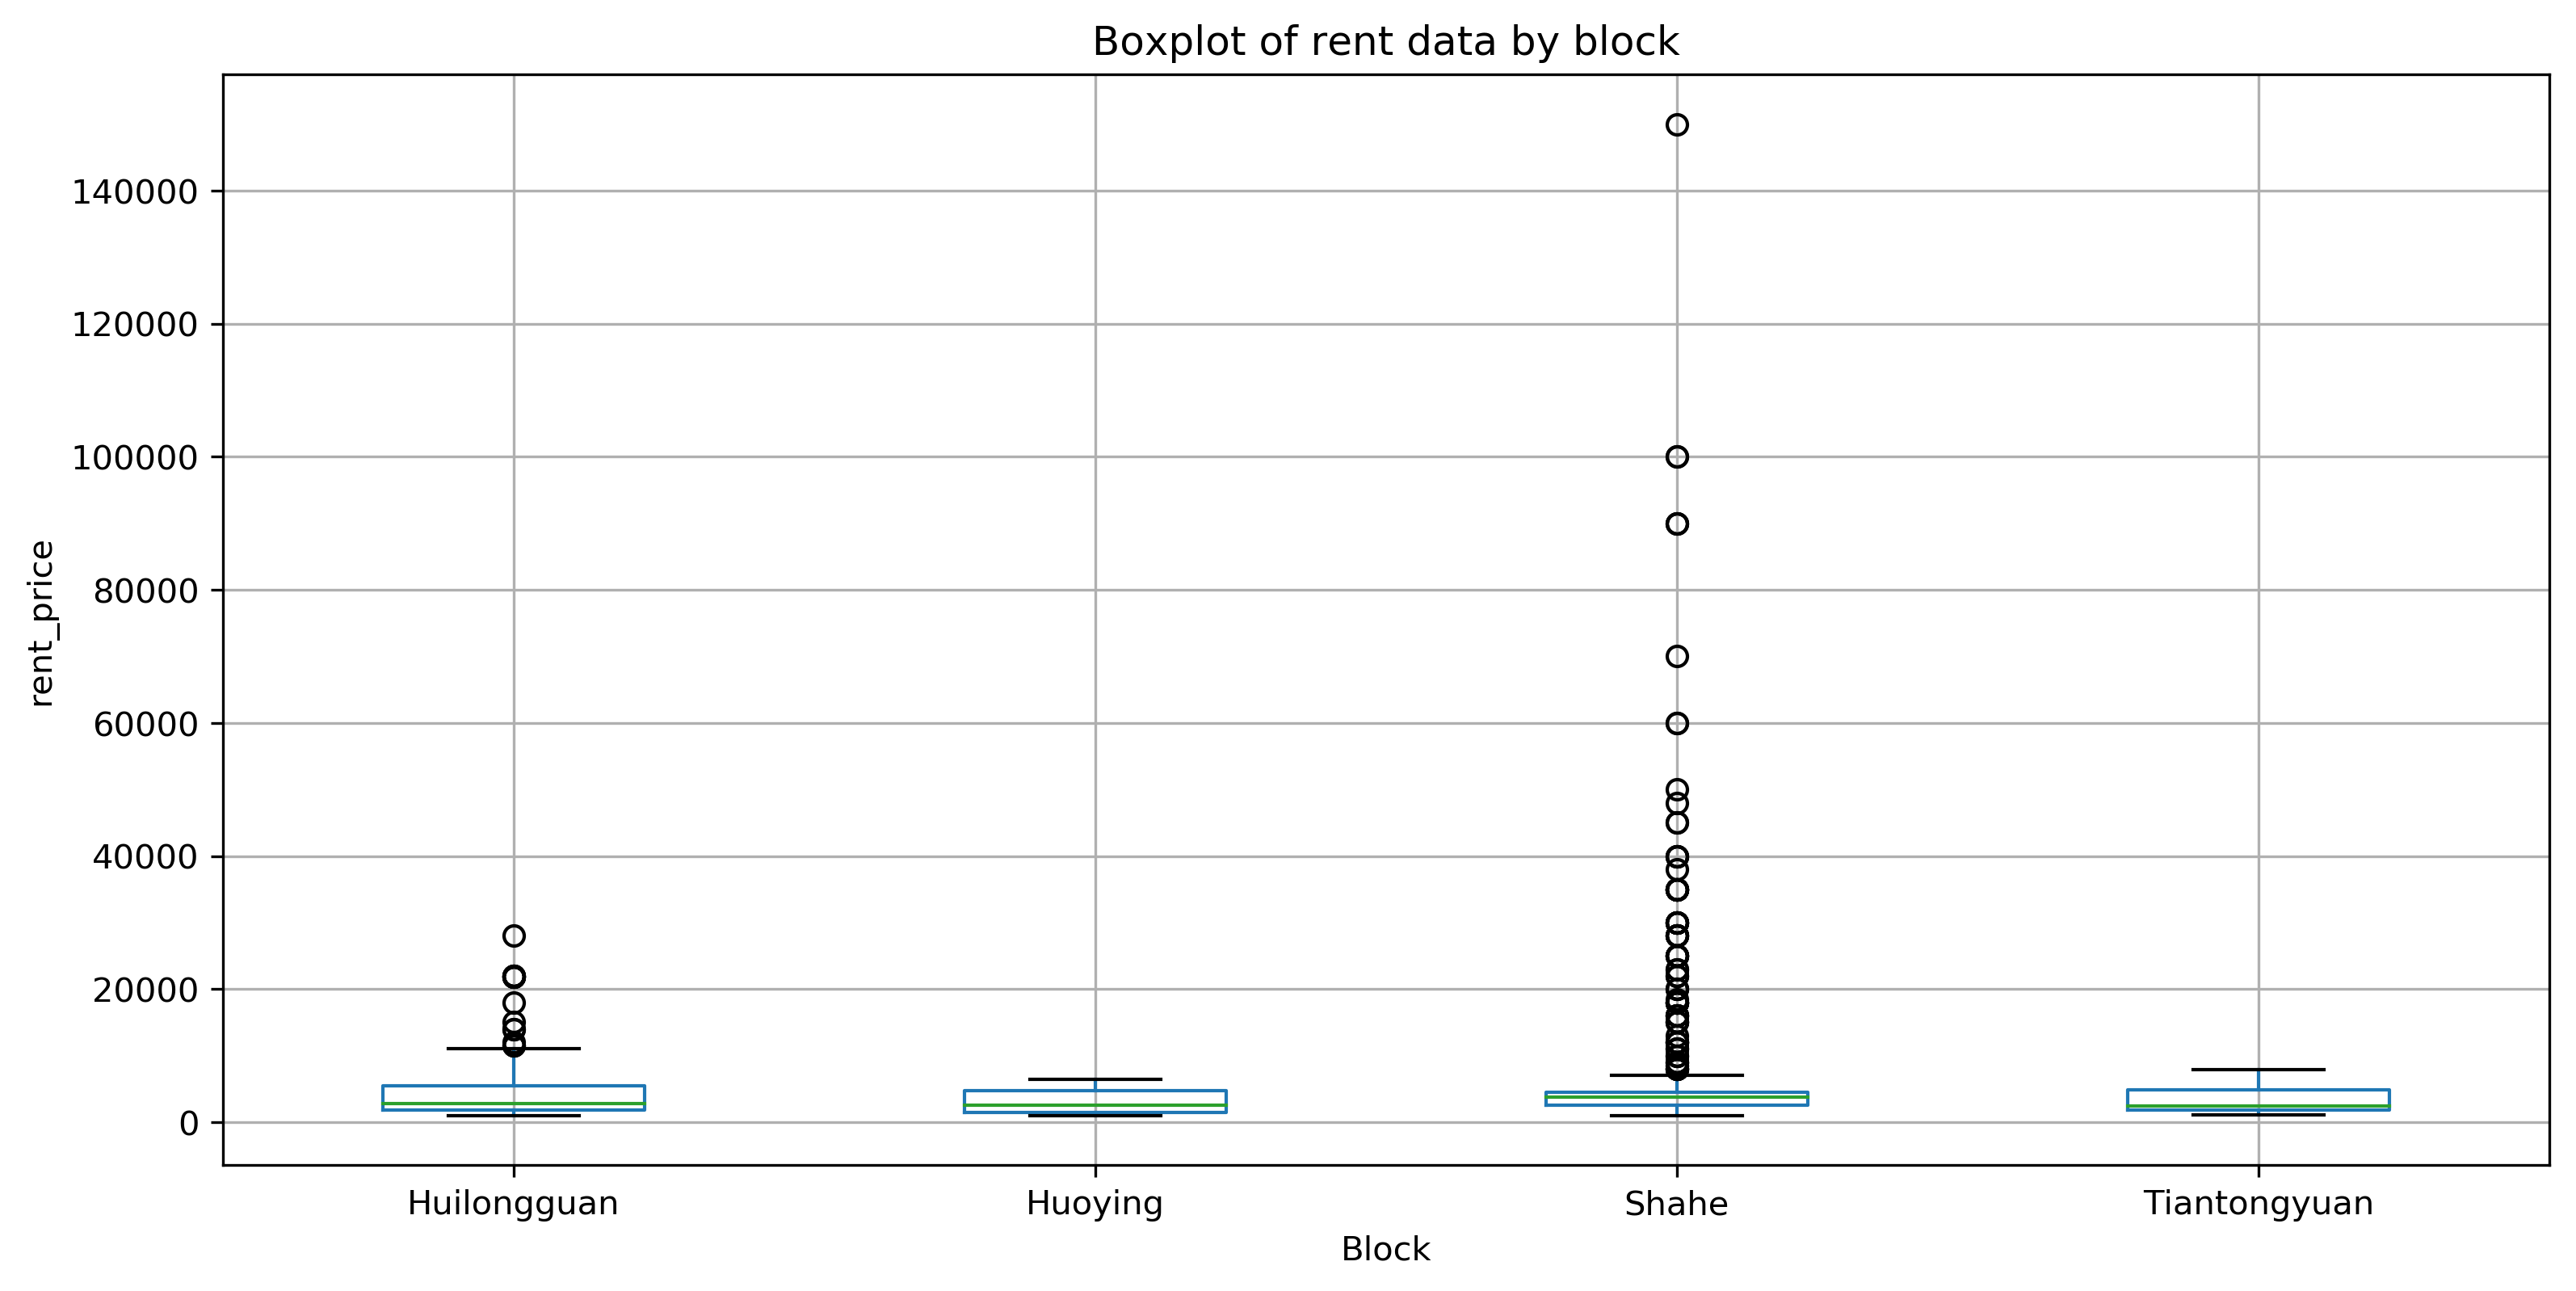

In [19]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 绘制售价数据的箱型图
fig, ax = plt.subplots(figsize=(12, 6))
house_data.boxplot(column='price/m2', by='location', ax=ax)
plt.title('Boxplot of house price data by block')
plt.xlabel('Block')
plt.ylabel('House price per square meter')
plt.suptitle('')
plt.show()

# 绘制租金数据的箱型图
fig, ax = plt.subplots(figsize=(12, 6))
rent_data.boxplot(column='rent_price', by='location', ax=ax)
plt.title('Boxplot of rent data by block')
plt.xlabel('Block')
plt.ylabel('rent_price')
plt.suptitle('')
plt.show()

In [20]:
# 计算每平方米租金（租金/面积）
rent_data['rent_per_m2'] = rent_data['rent_price'] / rent_data['area']

# 计算每个街区的中位每平方米房价
median_house_price_per_m2 = grouped_house['price/m2'].median()
print("每个街区的中位每平方米房价:")
print(median_house_price_per_m2)
print("\n")

# 计算每个街区的中位每平方米租金
median_rent_per_m2 = grouped_rent['rent_per_m2'].median()
print("每个街区的中位每平方米租金:")
print(median_rent_per_m2)
print("\n")

# 计算每个街区中位每平方米房价和每平方米租金比率
ratios = median_house_price_per_m2 / median_rent_per_m2
print("每个街区中位每平方米房价和每平方米租金比率:")
print(ratios)
print("\n")

每个街区的中位每平方米房价:
location
Huilongguan     51498.0
Huoying         45562.5
Shahe           42680.5
Tiantongyuan    34457.0
Name: price/m2, dtype: float64


每个街区的中位每平方米租金:
location
Huilongguan     85.714286
Huoying         85.000000
Shahe           55.555556
Tiantongyuan    85.464286
Name: rent_per_m2, dtype: float64


每个街区中位每平方米房价和每平方米租金比率:
location
Huilongguan     600.810000
Huoying         536.029412
Shahe           768.249000
Tiantongyuan    403.174258
dtype: float64




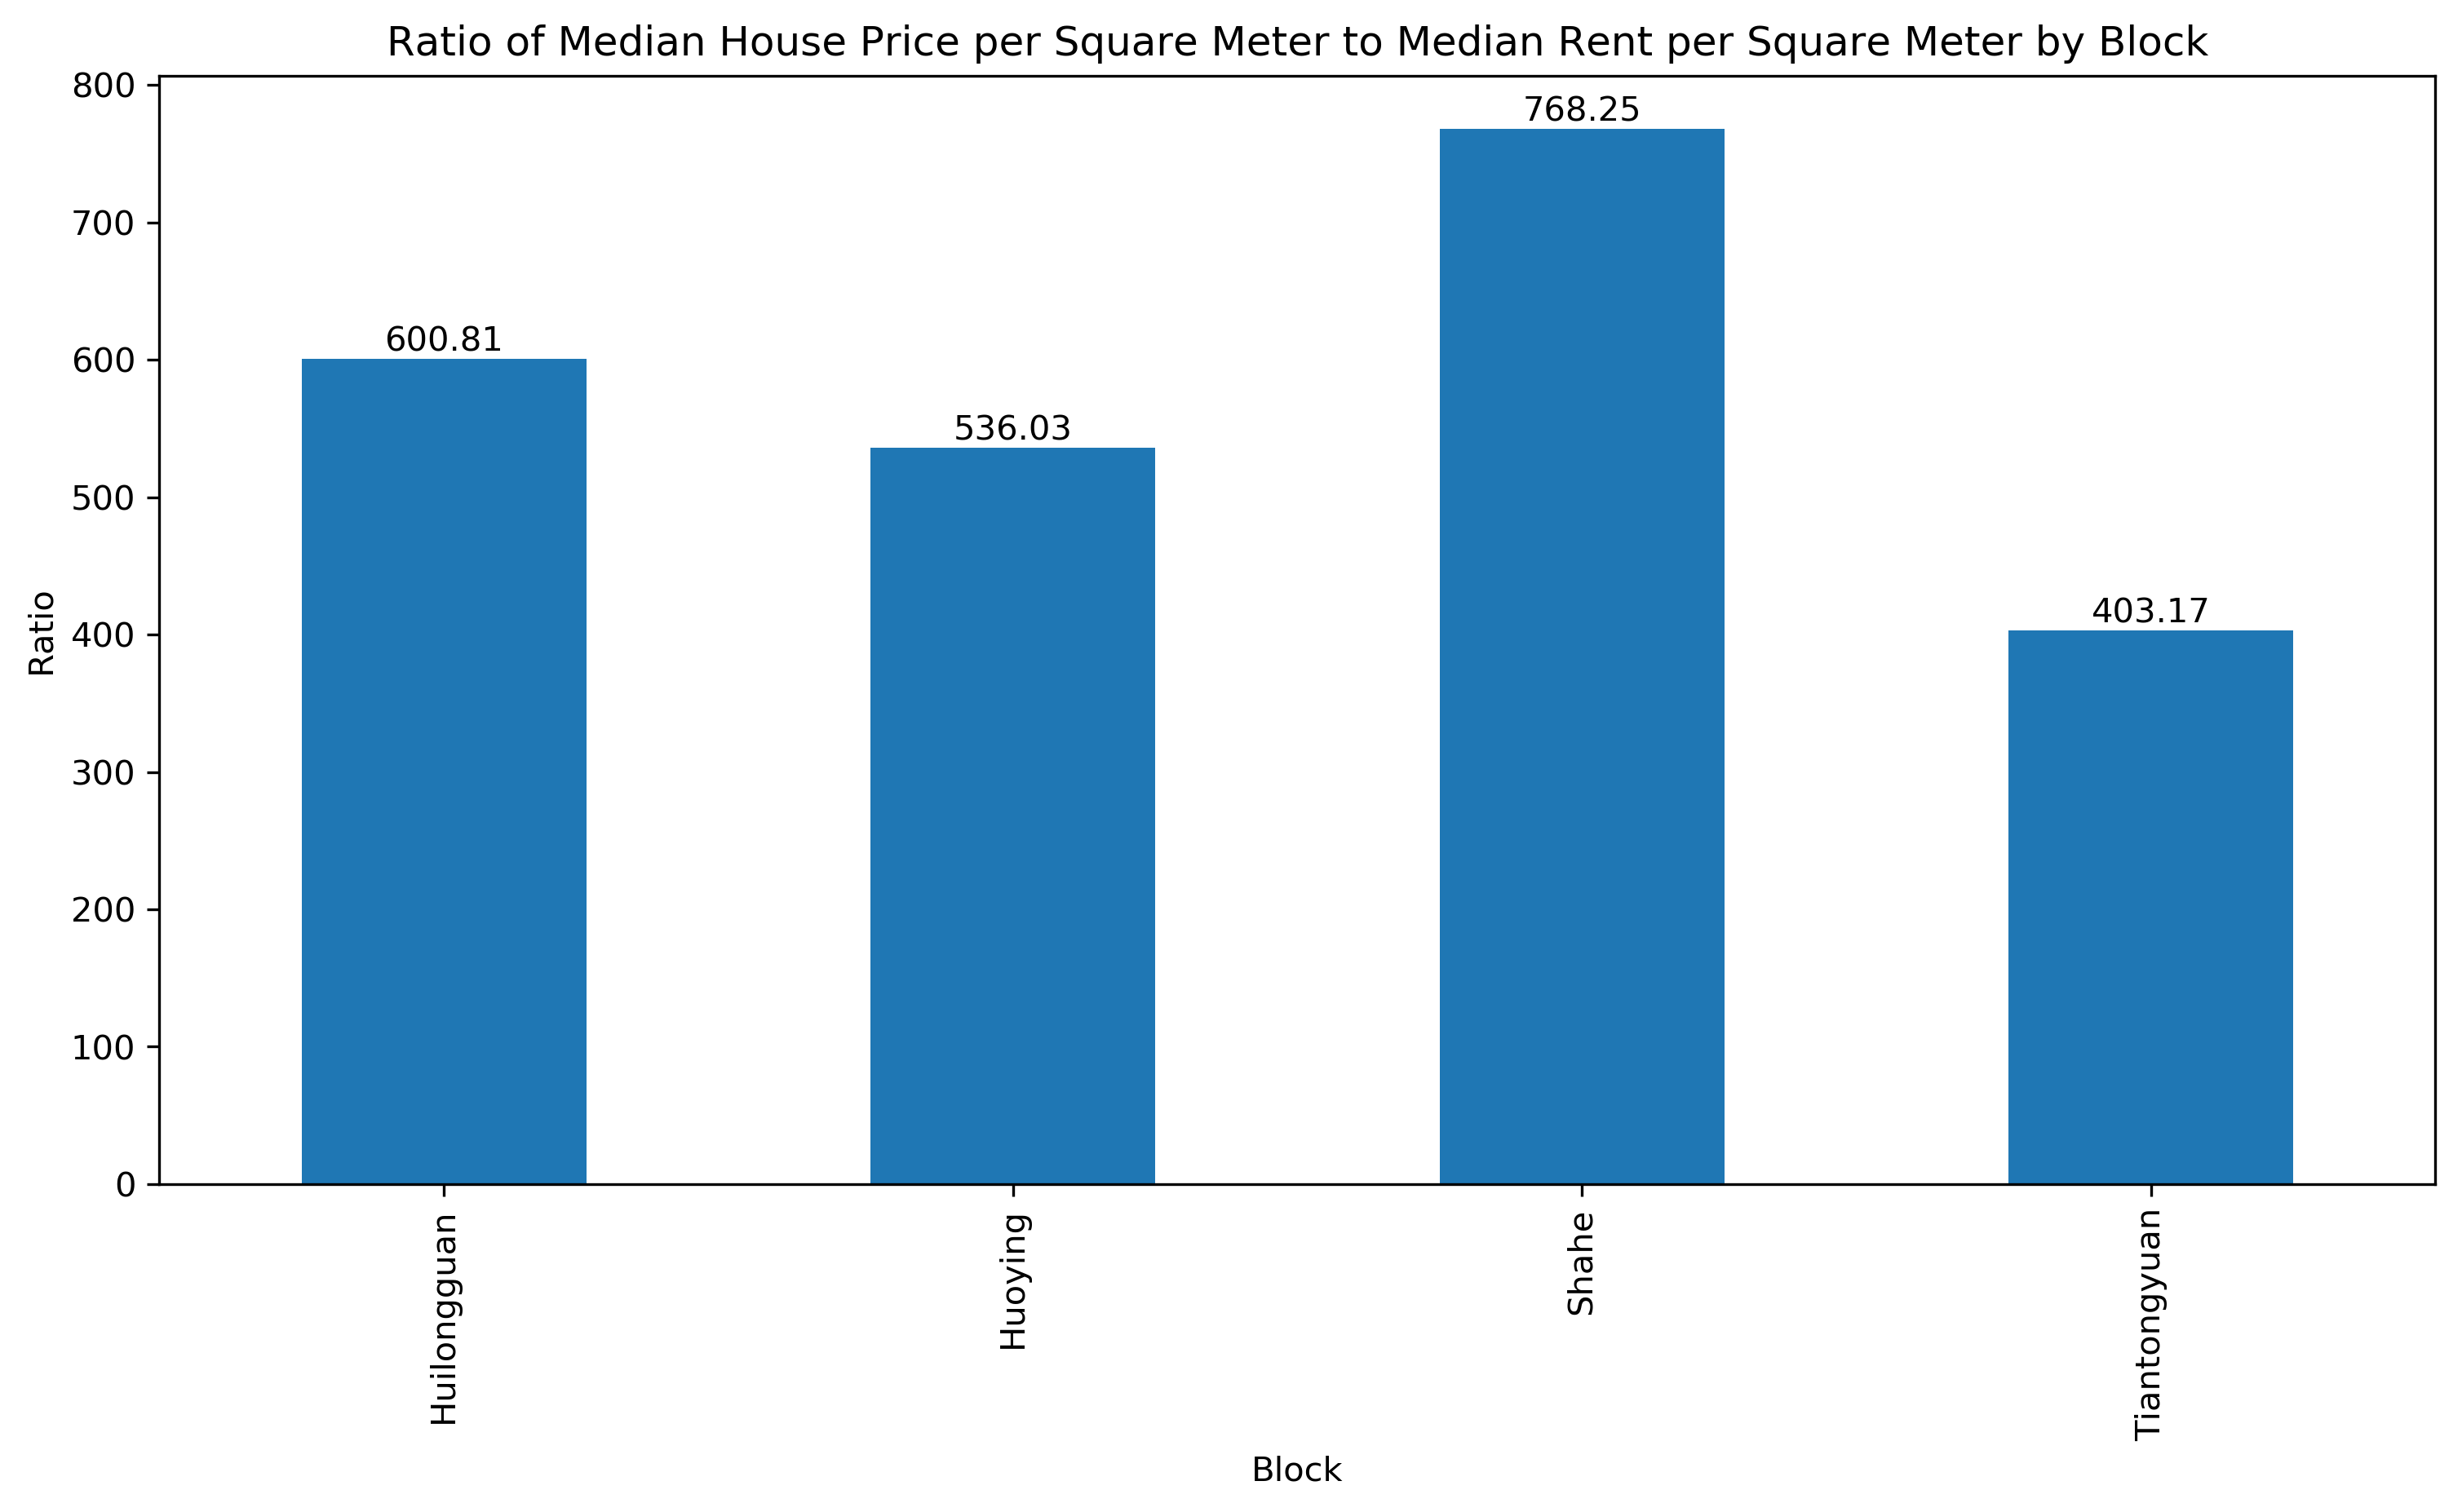

In [21]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 绘制条形图
fig, ax = plt.subplots(figsize=(12, 6))
bars = ratios.plot(kind='bar', ax=ax)
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
            ha='center', va='bottom')
plt.title('Ratio of Median House Price per Square Meter to Median Rent per Square Meter by Block')
plt.xlabel('Block')
plt.ylabel('Ratio')
plt.show()